In [ ]:
import numpy as np
import uproot as up
import awkward as ak
import matplotlib.pyplot as plt

In [168]:
import os
fpath = 'map.root'
run = up.open(fpath)
#print(run.keys())

In [172]:
#the structure of the saved files is such that the of the 1265 profiles, the last two are always skewl and skewt, all of those that come before however
#are such that the first is proft, then profl and finally track_...

print(len(run))
keys = np.array(run.keys())
print(keys[56*3])

1265
ProftTrack_31_2;1


In [190]:
n = 57
print(keys[n*3])
print(keys[n*3 + 1])
print(keys[n*3 + 2])
proft = run[keys[56*3]]
profl = run[keys[56*3 +1]]
track = run[keys[56*3 + 2]]

valuesl, edgesl = profl.to_numpy()
valuest, edgest = proft.to_numpy()
tratest = track.to_numpy()

ProftTrack_31_3;1
ProflTrack_31_3;1
Track_31_3_-2147483648_delta482_size44;1


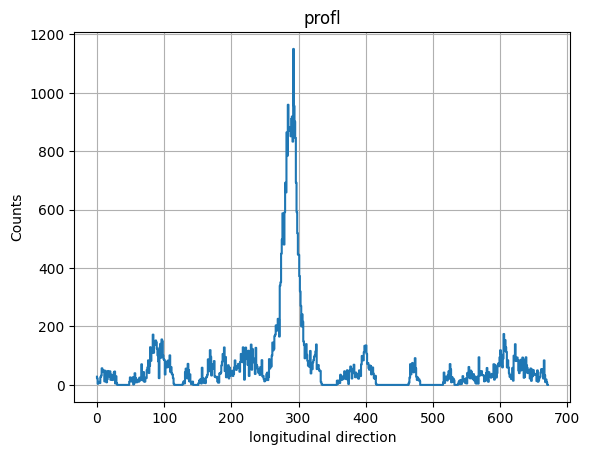

In [191]:
plt.step(edgesl[:-1], valuesl)
plt.xlabel("longitudinal direction")
plt.ylabel("Counts")
plt.title("profl")
plt.grid(True)
plt.show()

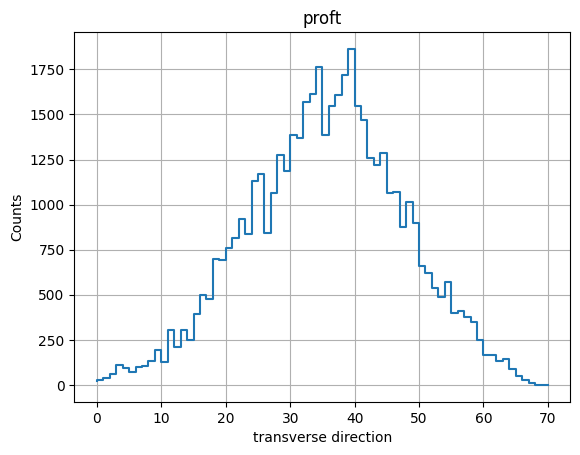

In [192]:
plt.step(edgest[:-1], valuest)
plt.xlabel("transverse direction")
plt.ylabel("Counts")
plt.title("proft")
plt.grid(True)
plt.show()

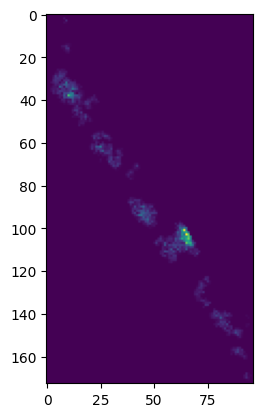

In [193]:
pedrf_fr = up.open(fpath)
arrt   = pedrf_fr['ProftTrack_31_6'].values()
arrl = pedrf_fr['ProflTrack_31_6'].values()
track = run[keys[n*3 + 2]].values().T
plt.imshow(track)
plt.show()

In [196]:
print(proft.values)
print(profl)

<bound method TH1.values of <TH1D (version 3) at 0x7fd85beeff50>>
<TH1D (version 3) at 0x7fd85b9bd150>


In [119]:
#The next step is to run a loop over all this to save all the histograms

from scipy.optimize import curve_fit

def gaussian(x, mu, sigma, A):
    return A*np.exp( -(x-mu)**2 / 2*(sigma**2))

N_steps = int((len(keys)-2)/3)

histl = []
histt = []
params = []

verbose = True

for i in range(N_steps):
    histt.append(run[ keys[ 3*(i)] ].to_numpy())
    histl.append(run[ keys[ 3*(i+1) ] ].to_numpy())
    center = (histt[i][1][:-1] + histt[i][1][:-1])/2
    y = histt[i][0]
    popt, pcov = curve_fit(gaussian, center, y)
    params.append(popt)
    if verbose:
        print('t = ', keys[3*i])
        print('l = ', keys[3*i +1])
        print('i = ', i, '\n')

t =  ProftTrack_0_3;1
l =  ProflTrack_0_3;1
i =  0 

t =  ProftTrack_0_4;1
l =  ProflTrack_0_4;1
i =  1 

t =  ProftTrack_0_7;1
l =  ProflTrack_0_7;1
i =  2 

t =  ProftTrack_0_9;1
l =  ProflTrack_0_9;1
i =  3 

t =  ProftTrack_1_2;1
l =  ProflTrack_1_2;1
i =  4 

t =  ProftTrack_2_0;1
l =  ProflTrack_2_0;1
i =  5 

t =  ProftTrack_2_1;1
l =  ProflTrack_2_1;1
i =  6 

t =  ProftTrack_5_3;1
l =  ProflTrack_5_3;1
i =  7 

t =  ProftTrack_5_4;1
l =  ProflTrack_5_4;1
i =  8 

t =  ProftTrack_6_1;1
l =  ProflTrack_6_1;1
i =  9 

t =  ProftTrack_6_2;1
l =  ProflTrack_6_2;1
i =  10 

t =  ProftTrack_6_3;1
l =  ProflTrack_6_3;1
i =  11 

t =  ProftTrack_7_5;1
l =  ProflTrack_7_5;1
i =  12 

t =  ProftTrack_7_6;1
l =  ProflTrack_7_6;1
i =  13 

t =  ProftTrack_8_2;1
l =  ProflTrack_8_2;1
i =  14 

t =  ProftTrack_8_4;1
l =  ProflTrack_8_4;1
i =  15 

t =  ProftTrack_8_5;1
l =  ProflTrack_8_5;1
i =  16 

t =  ProftTrack_8_6;1
l =  ProflTrack_8_6;1
i =  17 

t =  ProftTrack_10_1;1
l =  ProflTrack

/tmp/ipykernel_804/3991364513.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gaussian, center, y)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

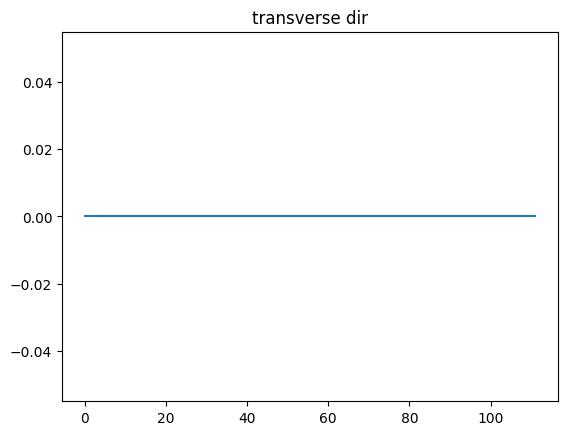

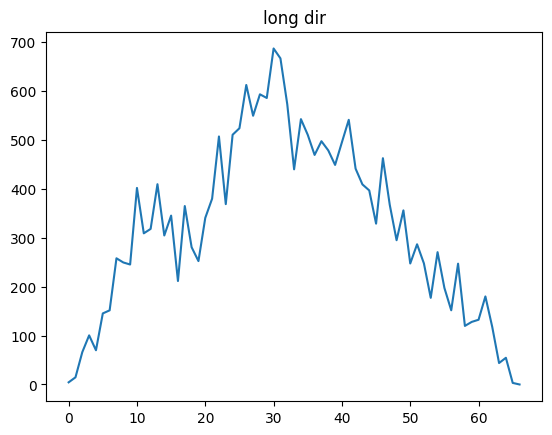

In [165]:
# for histt and histl the shapes are as follows: [N_clusters][2]
# the first of these 2 contains the array of the values of the bin, the y
# the second contains the array of the bind edges and has one more element than the previous array
# it can possibly be converted to a bin center array using centers = (edge[:-1] + edge[1:])/2

# with this I can try to fit a gaussian to this for instance for cluster 0
n = 57

center_t = (histt[n][1][:-1] + histt[n][1][:-1])/2
y_t = histt[n][0]
plt.plot(center_t, y_t)
plt.title('transverse dir')
plt.show()

center_l = (histl[n][1][:-1] + histl[n][1][:-1])/2
y_l = histl[n][0]
plt.plot(center_l, y_l)
plt.title('long dir')
plt.show()

In [79]:
plt.

[ 3.60867990e+01 -8.79289698e-02  7.63649325e+02]


In [166]:
pedrf_fr = up.open(fpath)
arrt   = pedrf_fr['ProftTrack_31_6'].values()
arrl = pedrf_fr['ProflTrack_31_6'].values()
track = run[keys[170]].values().T


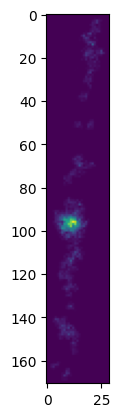

In [167]:
plt.imshow(track)

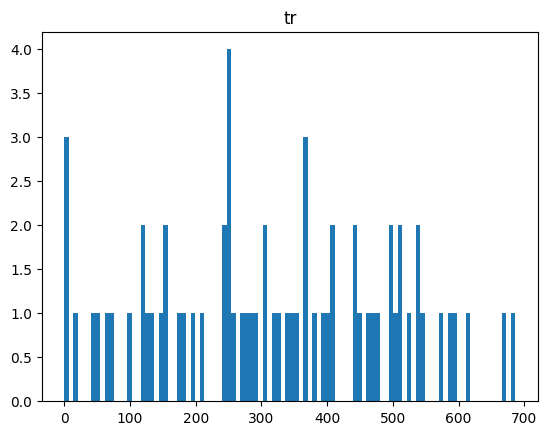

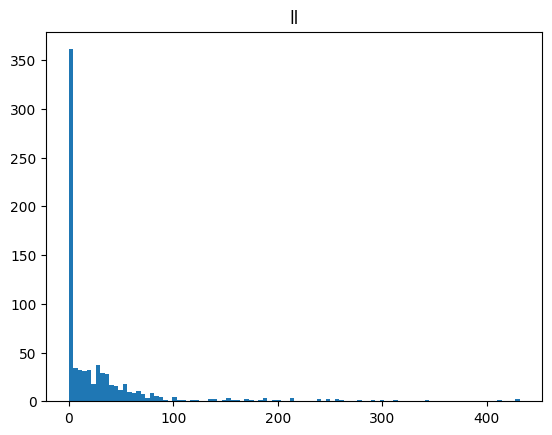

In [146]:
plt.hist(arrt, bins=100)
plt.title('tr')
plt.show()

plt.hist(arrl, bins=100)
plt.title('ll')
plt.show()